In [ ]:
# 데이터마이닝및분석 HW1
# 고객이 호텔 예약을 취소할 것인지를 예측하는 프로젝트

# 작성일: 2023-05-18
# 작성자: 이윤선(2116810)

In [1587]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sm-datamining-hw1/sample_submission.csv
/kaggle/input/sm-datamining-hw1/train.csv
/kaggle/input/sm-datamining-hw1/test.csv


In [1588]:
train = pd.read_csv('/kaggle/input/sm-datamining-hw1/train.csv')
test = pd.read_csv('/kaggle/input/sm-datamining-hw1/test.csv')
train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled


In [1589]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [1590]:
# 데이터 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25392 entries, 0 to 25391
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            25392 non-null  object 
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   type_of_meal_plan                     25392 non-null  object 
 6   required_car_parking_space            25392 non-null  int64  
 7   room_type_reserved                    25392 non-null  object 
 8   lead_time                             25392 non-null  int64  
 9   arrival_year                          25392 non-null  int64  
 10  arrival_month                         25392 non-null  int64  
 11  arrival_date   

In [1591]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000
mean,1.845069,0.105151,0.810137,2.201323,0.031348,85.411508,2017.819471,7.423952,15.625118,0.025165,0.023905,0.156191,103.485770,0.618305
std,0.519044,0.401900,0.867761,1.396599,0.174261,85.745937,0.384635,3.059601,8.730304,0.156630,0.378652,1.818933,35.067053,0.786555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.865000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.150000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


In [1592]:
# 결측치 확인
train.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [1593]:
train.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000,25392.000000
mean,1.845069,0.105151,0.810137,2.201323,0.031348,85.411508,2017.819471,7.423952,15.625118,0.025165,0.023905,0.156191,103.485770,0.618305
std,0.519044,0.401900,0.867761,1.396599,0.174261,85.745937,0.384635,3.059601,8.730304,0.156630,0.378652,1.818933,35.067053,0.786555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,58.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.865000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.150000,1.000000
max,4.000000,10.000000,6.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,375.500000,5.000000


Text(0, 0.5, 'Value')

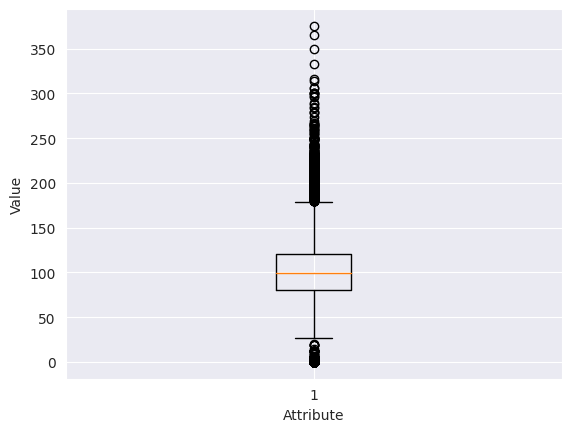

In [1594]:
# 이상치 확인
fig, ax = plt.subplots()

ax.boxplot(train['avg_price_per_room'])

ax.set_xlabel('Attribute')
ax.set_ylabel('Value')


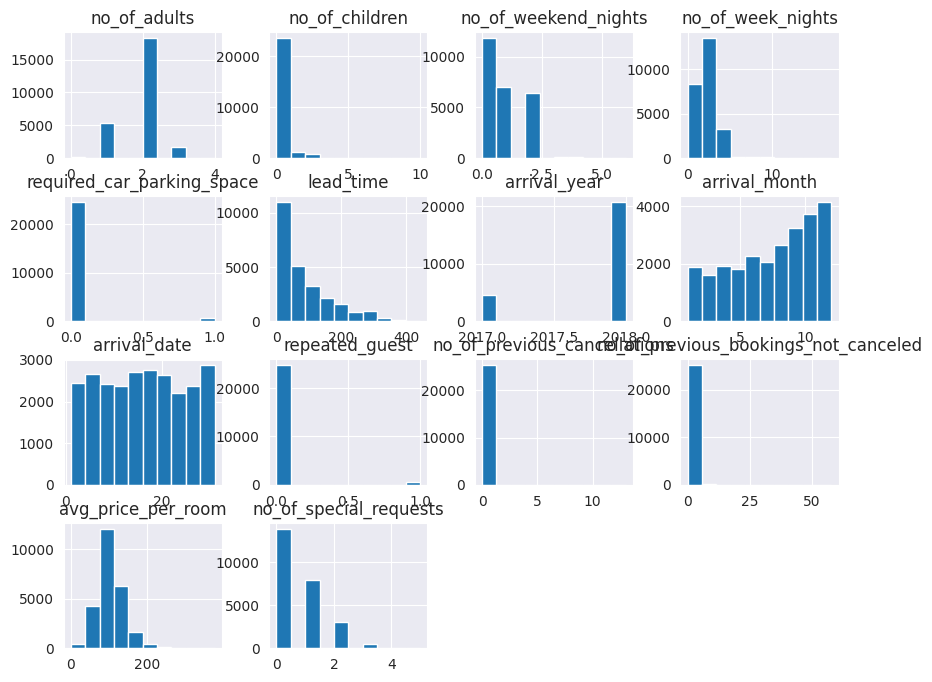

In [1595]:
# 시각화
train.hist(bins=10, figsize=(10,8))
plt.show()

<AxesSubplot: >

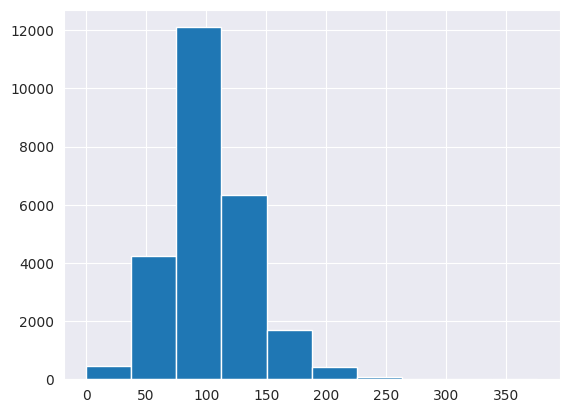

In [1596]:
train['avg_price_per_room'].hist()

array([[<AxesSubplot: xlabel='no_of_adults', ylabel='no_of_adults'>,
        <AxesSubplot: xlabel='no_of_children', ylabel='no_of_adults'>,
        <AxesSubplot: xlabel='no_of_weekend_nights', ylabel='no_of_adults'>,
        <AxesSubplot: xlabel='no_of_week_nights', ylabel='no_of_adults'>,
        <AxesSubplot: xlabel='avg_price_per_room', ylabel='no_of_adults'>,
        <AxesSubplot: xlabel='no_of_special_requests', ylabel='no_of_adults'>],
       [<AxesSubplot: xlabel='no_of_adults', ylabel='no_of_children'>,
        <AxesSubplot: xlabel='no_of_children', ylabel='no_of_children'>,
        <AxesSubplot: xlabel='no_of_weekend_nights', ylabel='no_of_children'>,
        <AxesSubplot: xlabel='no_of_week_nights', ylabel='no_of_children'>,
        <AxesSubplot: xlabel='avg_price_per_room', ylabel='no_of_children'>,
        <AxesSubplot: xlabel='no_of_special_requests', ylabel='no_of_children'>],
       [<AxesSubplot: xlabel='no_of_adults', ylabel='no_of_weekend_nights'>,
        <AxesSubplo

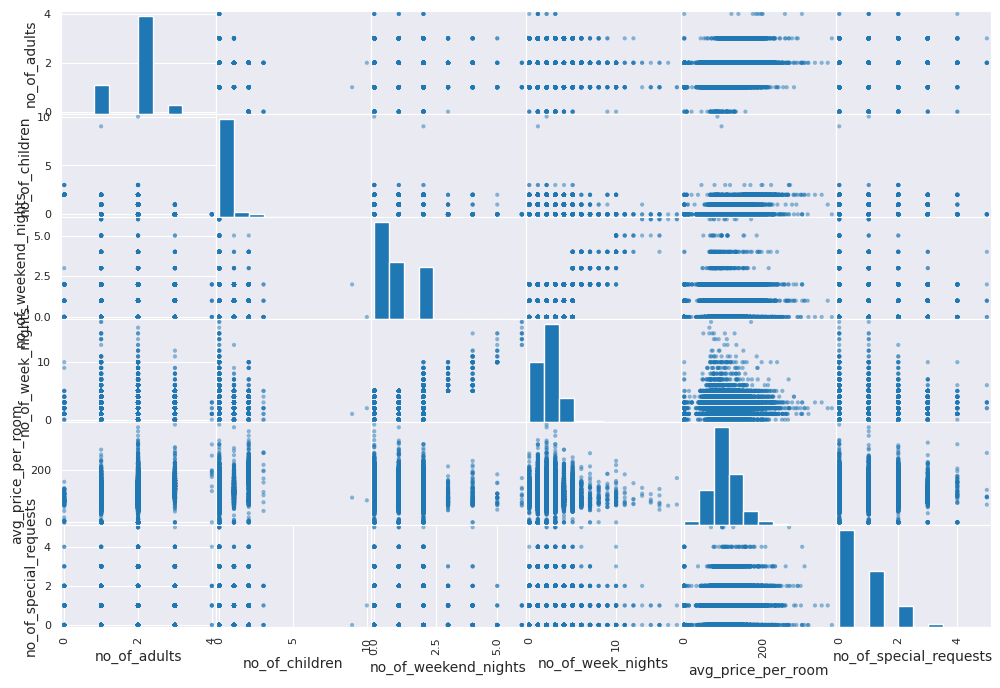

In [1604]:
# 특성 간 관계 확인
from pandas.plotting import scatter_matrix
attributes = ['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights', 
              'avg_price_per_room','no_of_special_requests']
scatter_matrix(train[attributes], figsize=(12,8))

In [1597]:
#train["avg_price_per_room"] = pd.cut(train["avg_price_per_room"],bins=5, labels=['Very Low','Low','Normal','High', 'Very High'])
train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN29581,2,0,1,3,Meal Plan 1,0,Room_Type 1,200,2018,8,29,Online,0,0,0,90.95,0,Canceled
1,INN06326,2,0,1,3,Meal Plan 1,0,Room_Type 1,79,2018,3,24,Online,0,0,0,90.95,1,Canceled
2,INN33900,2,0,1,4,Meal Plan 1,0,Room_Type 4,78,2018,4,6,Online,0,0,0,99.45,1,Not_Canceled
3,INN00721,2,0,2,0,Meal Plan 1,0,Room_Type 1,61,2017,10,4,Offline,0,0,0,91.00,0,Not_Canceled
4,INN22121,2,1,0,4,Meal Plan 1,0,Room_Type 1,201,2018,11,1,Online,0,0,0,82.28,3,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25387,INN16851,2,0,2,2,Meal Plan 1,0,Room_Type 1,43,2017,12,26,Offline,0,0,0,55.00,2,Not_Canceled
25388,INN06266,1,0,0,2,Meal Plan 2,0,Room_Type 1,102,2017,10,16,Online,0,0,0,80.00,0,Canceled
25389,INN11285,2,0,0,2,Meal Plan 1,0,Room_Type 1,5,2018,5,24,Corporate,0,0,0,110.00,1,Not_Canceled
25390,INN00861,2,0,0,3,Meal Plan 1,0,Room_Type 1,213,2018,6,7,Online,0,0,0,130.00,0,Canceled


In [1598]:
# Preprocessing
feature_names = ["no_of_adults", "no_of_children", "lead_time","avg_price_per_room", "no_of_weekend_nights", 
                 "no_of_week_nights", "no_of_special_requests", "room_type_reserved", "market_segment_type", 
                 "arrival_month", "no_of_previous_bookings_not_canceled", "required_car_parking_space"]
X = train[feature_names]
X = pd.get_dummies(X).values
y = train["booking_status"].values

In [1599]:
#Decision Tree 학습/예측/평가
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
dt_model = DecisionTreeClassifier(max_depth=11, min_samples_split=7)
dt_model.fit(X_train, y_train)

scores = cross_validate(dt_model, X_train, y_train, return_train_score=True)
dt_pred = dt_model.predict(X_test)
print("Training Accuracy : ", np.mean(scores['train_score']))
print("Test Accuracy : ", np.mean(scores['test_score']))

print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

Training Accuracy :  0.8919788043586856
Test Accuracy :  0.8658326802929898
DecisionTreeClassifier 정확도: 0.8752


In [1600]:
x_test = test[feature_names]
x_test = pd.get_dummies(x_test).values

In [1601]:
prediction_list= dt_model.predict(x_test)
# prediction_list= nb_model.predict(x_test)
# prediction_list= lr_model.predict(x_test)
# prediction_list= mlp_model.predict(x_test)
# prediction_list= knn_model.predict(x_test)
submit = pd.read_csv("/kaggle/input/sm-datamining-hw1/sample_submission.csv")
submit["booking_status"] = prediction_list
submit = submit.replace({'Canceled':1, 'Not_Canceled':0})
submit

,Booking_ID,booking_status
0,INN04969,0
1,INN34541,0
2,INN36109,0
3,INN01554,1
4,INN24975,0
...,...,...
10878,INN29686,0
10879,INN01107,1
10880,INN06811,0
10881,INN27777,1


In [1602]:
submit.to_csv("dt_submit.csv",index=False)